### **ABSTRACT**

Stroke is a medical disorder in which the blood arteries in the brain are ruptured, causing damage to the brain. When the supply of blood and other nutrients to the brain is interrupted, symptoms might develop. According to the World Health Organization (WHO), stroke is the greatest cause of death and disability globally. Early recognition of the various warning signs of a stroke can help reduce the severity of the stroke.

Stroke occurs when the blood flow to various areas of the brain is disrupted or diminished, resulting in the cells in those areas of the brain not receiving the nutrients and oxygen they require and dying. A stroke is a medical emergency that requires urgent medical attention. Early detection and appropriate management are required to prevent further damage to the affected area of the brain and other complications in other parts of the body.

The World Health Organization (WHO) estimates that 15 million people worldwide suffer from strokes each year, with one person dying every 4-5 minutes in the affected population. Stroke is the 16 leading cause of mortality in the United States according to the Centers for Disease Control and Prevention (CDC) [1]. Stroke is a noncommunicable disease that kills approximately 11% of the population.

In this project, I am working on stroke dataset. Here AutoMLH20 and Logistic Regression library is used for analysis. 

Source- https://pubmed.ncbi.nlm.nih.gov/34868531/




In [453]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [454]:
#For Pandas
df_pd=pd.read_csv('https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv')
df_pd.head()
df_pd_org=df_pd.copy(deep=True)

In [455]:
#Getch the first 10 rows
df_pd.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [456]:
#Description of all the columns 
df_pd.dropna(axis=0,how='any', inplace=True)
df_pd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


BMI has null values

<Figure size 2000x1500 with 0 Axes>

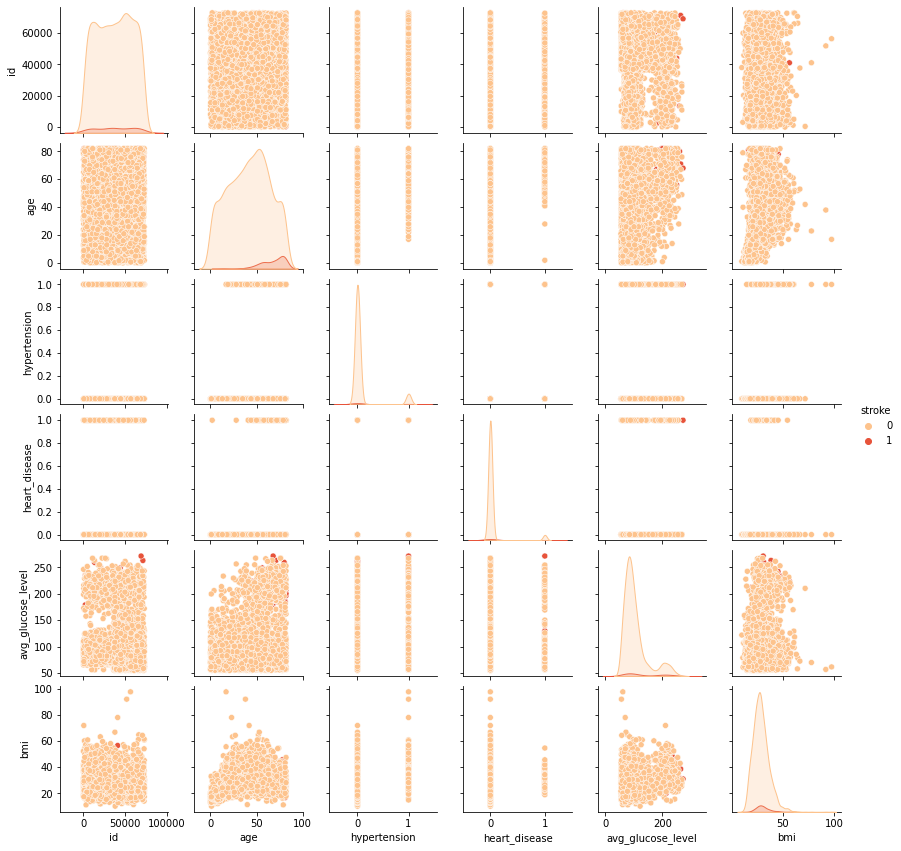

In [457]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=df_pd,hue='stroke',size=2,palette='OrRd')
plt.show()

People with high BMI, high average glucose level and heart disease are more prone to heart attack

In [458]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
df_pd['gender']=df_pd['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df_pd["Residence_type"] = df_pd["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df_pd["ever_married"] = df_pd["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# Removing the observations that have smoking type unknown. 
df_pd=df_pd[df_pd['smoking_status']!='Unknown']

Converting the categorical values to 1's and 0's

In [459]:
# One Hot encoding smoking_status, work_type
data_dummies = df_pd[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
df_pd.drop(columns=['smoking_status','work_type'],inplace=True)

One hot encoding for smoking status and work type

In [460]:
data_stroke=df_pd['stroke']
df_pd.drop(columns=['stroke'],inplace=True)
df_pd=df_pd.merge(data_dummies,left_index=True, right_index=True,how='left')


Preparing the data.

In [461]:
df_pd.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,0,0,1,0,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,0,1,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,0,0,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,0,1,0,0,0,0,1,0
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,0,0,0,0,1,0,0


In [462]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_pd,data_stroke,test_size=0.25,random_state=24)

In [463]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [464]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

First we have used Standard Scaler to transform the values and then SMOTE is used to balance the output

In [465]:
df_pd.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,37339.006130,0.390835,48.645943,0.119089,0.060128,0.758611,0.509340,108.321891,30.290047,0.244308,0.540572,0.215120,0.150029,0.004086,0.642440,0.183596,0.019848
std,21049.976345,0.488009,18.851239,0.323941,0.237759,0.427988,0.499986,47.703541,7.295958,0.429739,0.498424,0.410965,0.357152,0.063804,0.479352,0.387211,0.139499
min,84.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18997.500000,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,77.237500,25.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38068.500000,0.000000,50.000000,0.000000,0.000000,1.000000,1.000000,92.360000,29.100000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55464.250000,1.000000,63.000000,0.000000,0.000000,1.000000,1.000000,116.207500,34.100000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [466]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [467]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(df_pd,data_stroke,test_size=0.25,random_state=24)

In [468]:
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,x_test,y_test,cmap="OrRd")
    metrics.plot_roc_curve(model, x_test, y_test)  

LOGISTIC REGRESSION

Testing Score 
 0.7199533255542591
Coefficients of logistic regression
(array([[ 0.02308655, -0.22751077,  1.58371042,  0.19340978,  0.03148468,
         0.22036479, -0.02059399,  0.20055769,  0.00383209, -0.02504417,
        -0.08763371,  0.13328837, -0.13002791, -0.15522073,  0.19656074,
         0.00865212, -0.29582649]]), array([-1.15247395]))


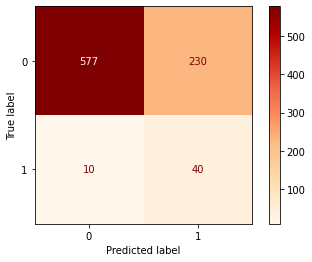

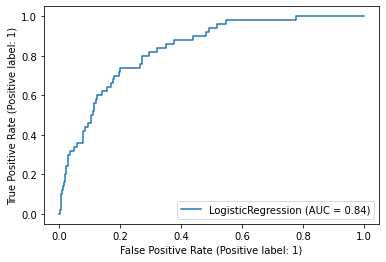

In [469]:
lg_reg=LogisticRegression()
Model(lg_reg)
print("Coefficients of logistic regression")
print((lg_reg.coef_, lg_reg.intercept_))


Logistic regression testing accuracy is 0.71 and AUC of 0.84. Age is the most important feature from the coefficients

DECISION TREE


Testing Score 
 0.7526254375729288


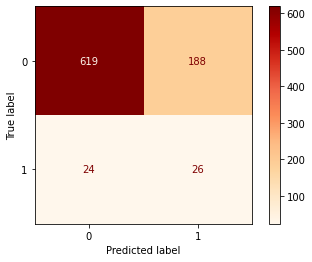

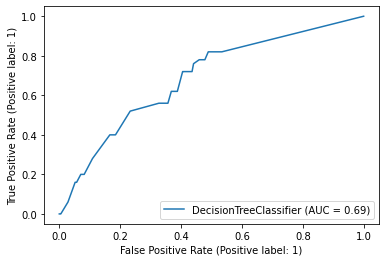

In [470]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier(max_depth=6)
Model(d_classif)

Decision Tree has performed better and has increased accuracy but decreased AUC than linear regression

RANDOM FOREST

Testing Score 
 0.7456242707117853


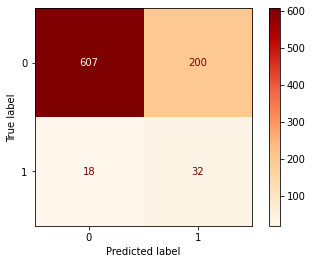

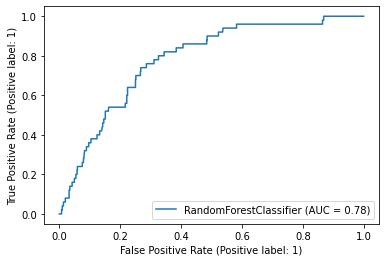

In [471]:
rfc=RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rfc.fit(x_train,y_train)
Model(rfc)


In [472]:
rfc.feature_importances_

array([3.21230439e-02, 4.61499327e-02, 4.49979787e-01, 8.84313033e-02,
       3.60485223e-02, 1.01146153e-01, 2.98421508e-02, 9.66681390e-02,
       4.92579303e-02, 4.14411646e-03, 1.79351178e-02, 6.83527743e-03,
       1.52441625e-02, 0.00000000e+00, 9.38499109e-03, 1.68037535e-02,
       5.61857110e-06])

RFC is a good model here in terms of accuracy and AUC score. Still logistic regression is the best in terms of accuracy and recall.

In [473]:
from sklearn.tree import plot_tree



INTERPRETING DECISION TREE NODES

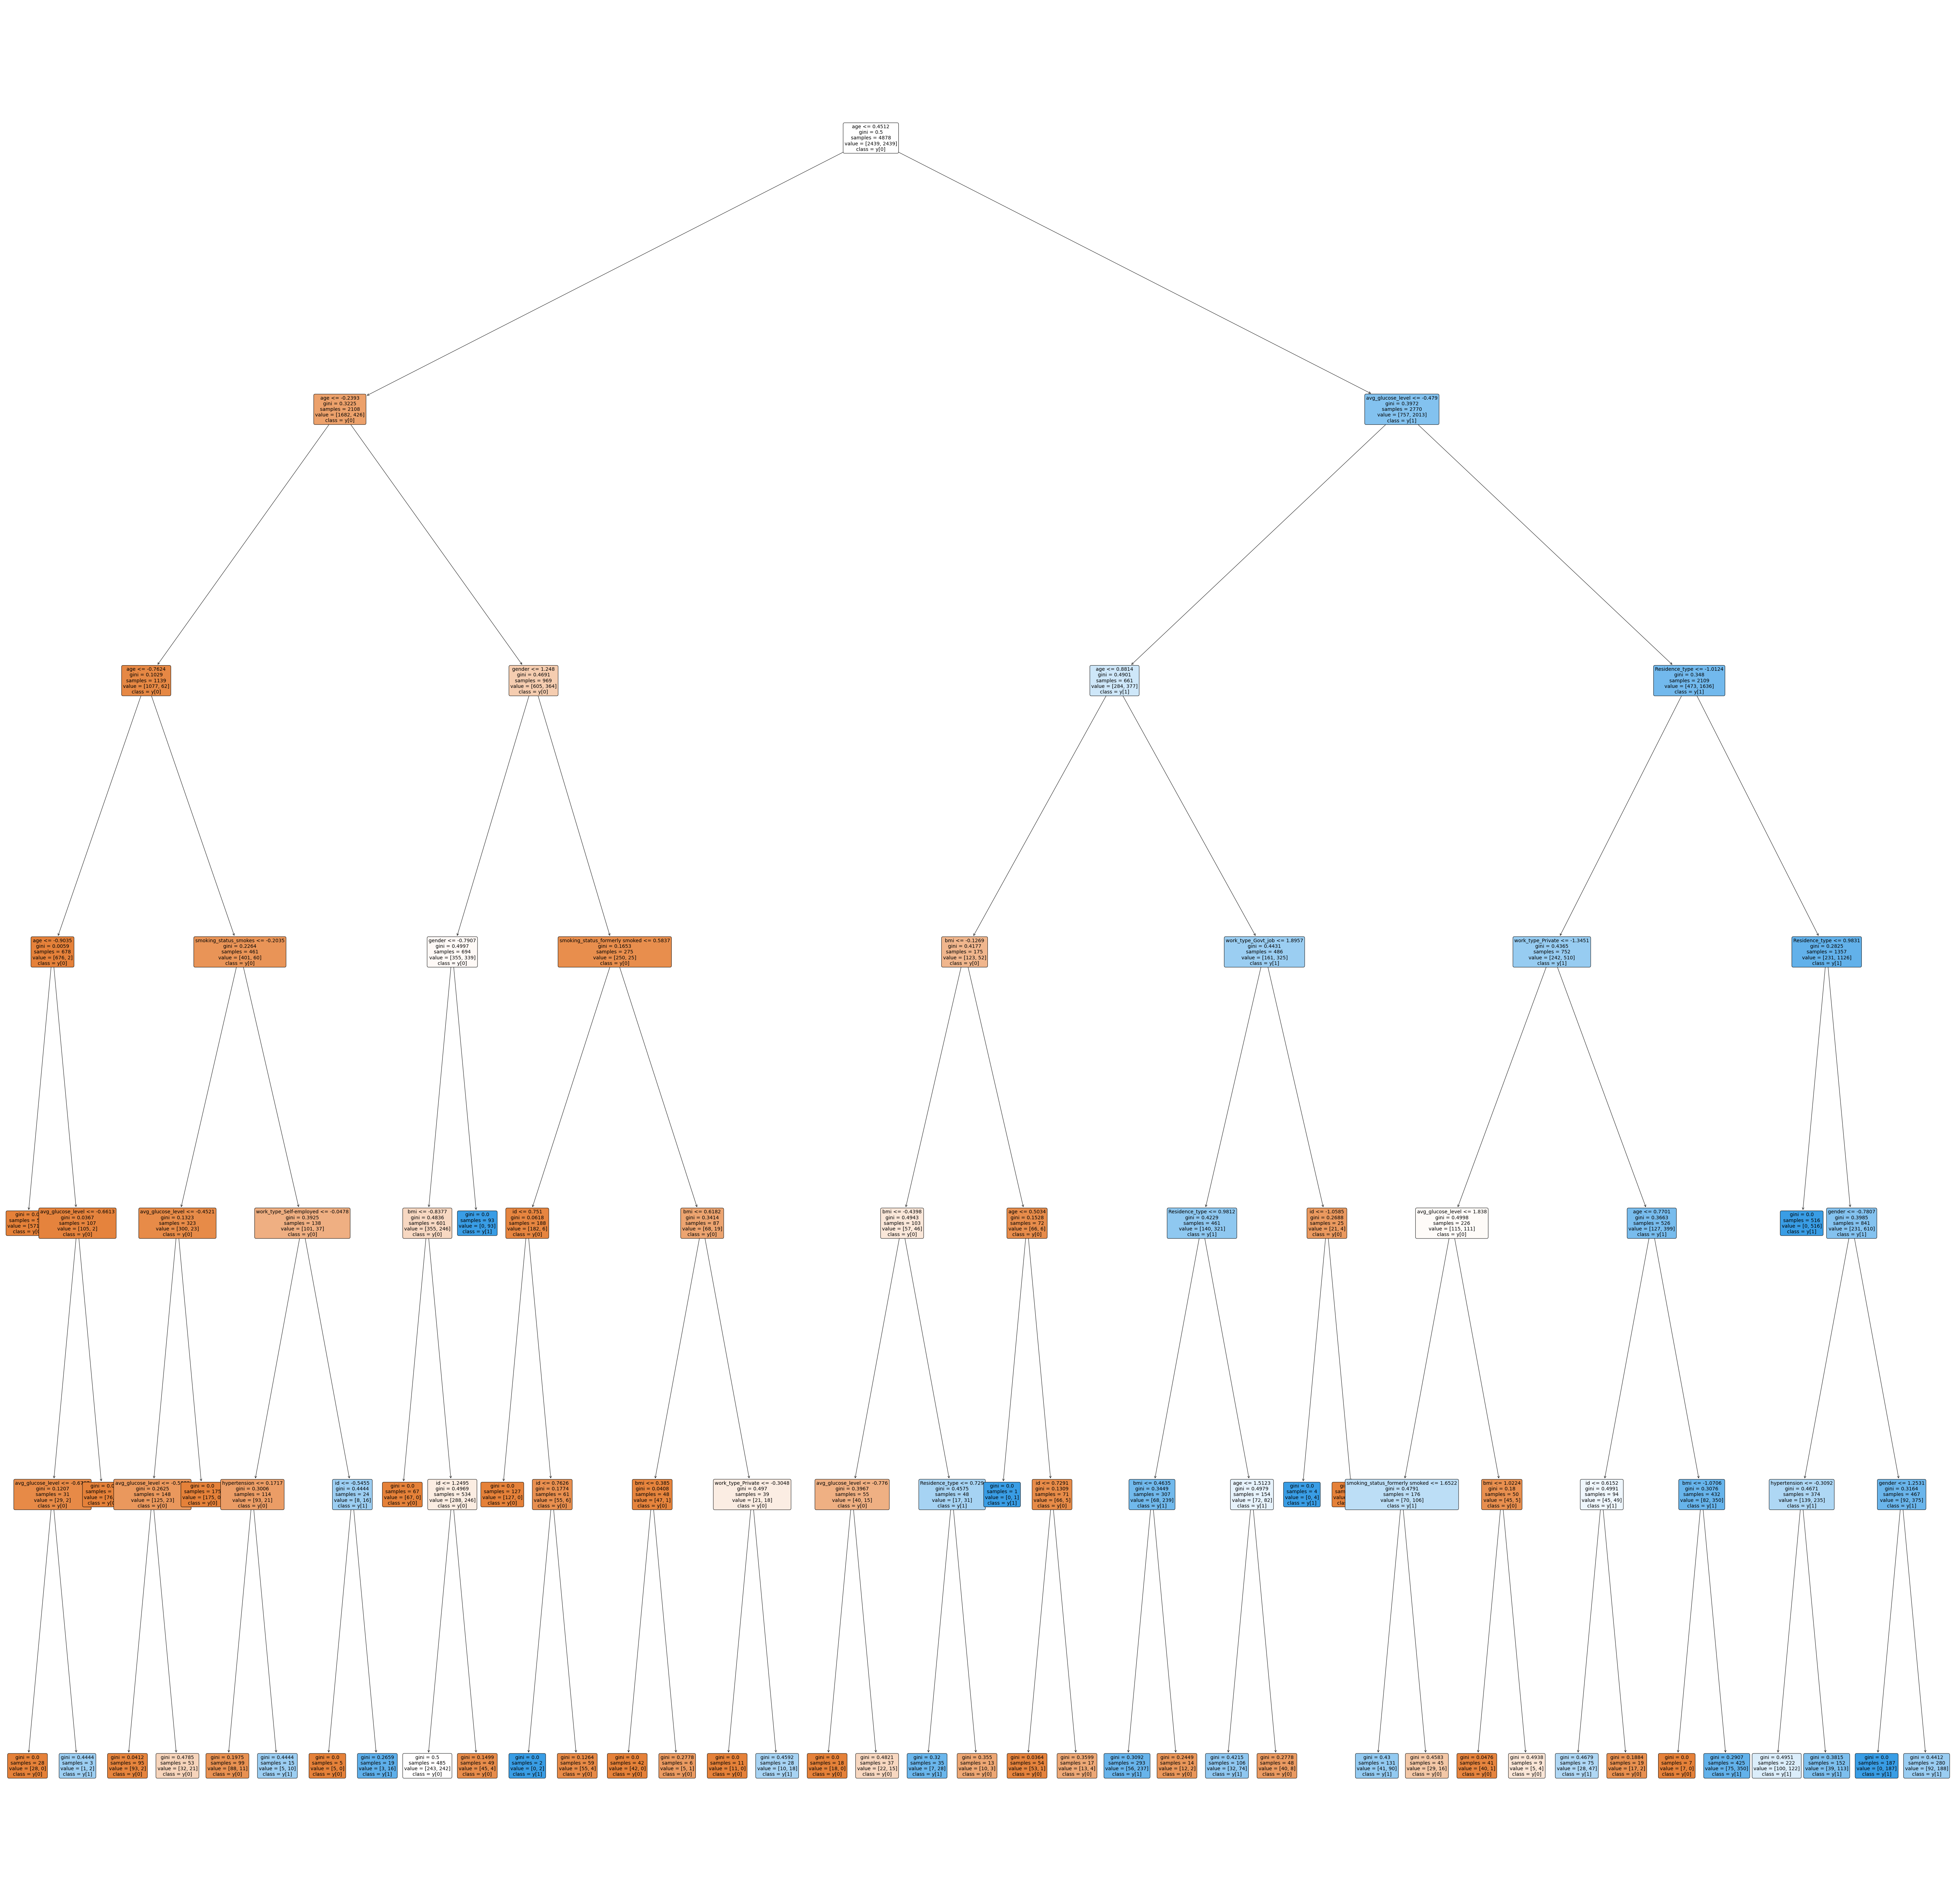

In [474]:
plt.figure(figsize=(100,100))
dec_tree = plot_tree(decision_tree=d_classif, feature_names = df_pd.columns, 
                     class_names =True , filled = True , precision = 4, rounded = True,fontsize=14)



From the tree, we can see that if the age is less, then there is low risk of stroke prediction. Hence from the first node, if the age is less it classifies into class 0. Moreover, if the age is more, it will check for the average glucose level and we can see if the average glucose is high there is more risk of heart prediction. Moreover when it goes to the next node, we can see that that the ones who have formerly smoked, it will classify as a higher risk of stroke. Moreover, we can see from the gender node that males are at a higher risk of stroke prediction. 

# Auto ML

In [475]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [476]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222


In [478]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [479]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:44907 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpduujylit
  JVM stdout: /tmp/tmpduujylit/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpduujylit/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:44907
Connecting to H2O server at http://127.0.0.1:44907 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_yo3qnh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [480]:
#For H2O
url = "https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [481]:
# Map stroke to Yes for 1 and No for 0 as stroke_category
df['stroke_category'] = df['stroke'].asfactor()
df["stroke_category"] = (df["stroke"] == 1).ifelse("Yes", "No")
df.head()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1,Yes
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1,Yes
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1,Yes
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Yes
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Yes
27419,Female,59,0,0,Yes,Private,Rural,76.15,nan,Unknown,1,Yes
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Yes


In [482]:
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [483]:
# Features and Target
X=df.columns
print(X)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'stroke_category']


In [484]:
#Separate features and target
y ='stroke'
y_category='stroke_category'
X.remove(y)
X.remove('id') # Remove id as it is useless
X.remove(y_category) 
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [485]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=123)

In [486]:
aml.train(x=X,y=y_category,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220425_21845_model_2


Model Summary: 


,,number_of_trees
0,,52.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03956675203634367
RMSE: 0.1989139312274122
LogLoss: 0.14542128432636303
Mean Per-Class Error: 0.28236310068068676
AUC: 0.88401973483694
AUCPR: 0.3493123201650468
Gini: 0.7680394696738799

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1708974502980709: 


,,No,Yes,Error,Rate
0,No,3648.0,212.0,0.0549,(212.0/3860.0)
1,Yes,104.0,100.0,0.5098,(104.0/204.0)
2,Total,3752.0,312.0,0.0778,(316.0/4064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.170897,0.387597,135.0
1,max f2,0.090897,0.495787,229.0
2,max f0point5,0.218187,0.396205,92.0
3,max accuracy,0.450582,0.953002,11.0
4,max precision,0.610584,1.000000,0.0
5,max recall,0.009378,1.000000,388.0
6,max specificity,0.610584,1.000000,0.0
7,max absolute_mcc,0.170897,0.356995,135.0
8,max min_per_class_accuracy,0.068285,0.808549,261.0
9,max mean_per_class_accuracy,0.062356,0.817942,271.0



Gains/Lift Table: Avg response rate:  5.02 %, avg score:  5.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010089,0.329881,11.661406,11.661406,0.585366,0.433945,0.585366,0.433945,0.117647,0.117647,1066.140603,1066.140603,0.113243
1,2,0.020177,0.271404,7.774271,9.717838,0.390244,0.295493,0.487805,0.364719,0.078431,0.196078,677.427068,871.783835,0.185198
2,3,0.030020,0.237631,5.976471,8.491160,0.300000,0.254755,0.426230,0.328665,0.058824,0.254902,497.647059,749.116040,0.236767
3,4,0.040108,0.220713,6.802487,8.066402,0.341463,0.228234,0.404908,0.303403,0.068627,0.323529,580.248685,706.640202,0.298400
4,5,0.050197,0.203437,4.858919,7.421761,0.243902,0.212131,0.372549,0.285059,0.049020,0.372549,385.891918,642.176086,0.339388
5,6,0.100148,0.148167,3.729161,5.579997,0.187192,0.173187,0.280098,0.229260,0.186275,0.558824,272.916063,457.999711,0.482917
6,7,0.150098,0.107927,2.257124,4.474188,0.113300,0.127794,0.224590,0.195494,0.112745,0.671569,125.712354,347.418836,0.549030
7,8,0.200049,0.078636,2.060852,3.871596,0.103448,0.093385,0.194342,0.169998,0.102941,0.774510,106.085193,287.159636,0.604821
8,9,0.299951,0.047888,0.932290,2.892631,0.046798,0.060494,0.145201,0.133527,0.093137,0.867647,-6.770984,189.263138,0.597699
9,10,0.400098,0.028772,0.440526,2.278851,0.022113,0.038125,0.114391,0.109647,0.044118,0.911765,-55.947391,127.885102,0.538708




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.0431095874436918
RMSE: 0.20762848418194407
LogLoss: 0.16007642483116596
Mean Per-Class Error: 0.2842680077212232
AUC: 0.844746901351214
AUCPR: 0.2173281899510361
Gini: 0.689493802702428

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12623009383678435: 


,,No,Yes,Error,Rate
0,No,3463.0,397.0,0.1028,(397.0/3860.0)
1,Yes,95.0,109.0,0.4657,(95.0/204.0)
2,Total,3558.0,506.0,0.1211,(492.0/4064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126230,0.307042,178.0
1,max f2,0.063232,0.446224,258.0
2,max f0point5,0.304850,0.261905,37.0
3,max accuracy,0.534333,0.950295,1.0
4,max precision,0.550428,1.000000,0.0
5,max recall,0.008969,1.000000,394.0
6,max specificity,0.550428,1.000000,0.0
7,max absolute_mcc,0.063232,0.292762,258.0
8,max min_per_class_accuracy,0.059774,0.779412,263.0
9,max mean_per_class_accuracy,0.050715,0.784951,282.0



Gains/Lift Table: Avg response rate:  5.02 %, avg score:  5.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010089,0.323743,8.746055,8.746055,0.439024,0.410478,0.439024,0.410478,0.088235,0.088235,774.605452,774.605452,0.082277
1,2,0.020177,0.268170,2.429460,5.587757,0.121951,0.293972,0.280488,0.352225,0.024510,0.112745,142.945959,458.775705,0.097460
2,3,0.030020,0.238092,2.490196,4.572163,0.125000,0.253901,0.229508,0.319988,0.024510,0.137255,149.019608,357.216329,0.112903
3,4,0.040108,0.219597,3.401243,4.277637,0.170732,0.227567,0.214724,0.296741,0.034314,0.171569,240.124342,327.763744,0.138408
4,5,0.050197,0.206317,3.887135,4.199154,0.195122,0.213691,0.210784,0.280049,0.039216,0.210784,288.713534,319.915417,0.169074
5,6,0.100148,0.147519,4.121704,4.160524,0.206897,0.175389,0.208845,0.227848,0.205882,0.416667,312.170385,316.052416,0.333247
6,7,0.150098,0.106726,3.434753,3.918997,0.172414,0.125622,0.196721,0.193828,0.171569,0.588235,243.475321,291.899711,0.461292
7,8,0.200049,0.074741,2.158988,3.479536,0.108374,0.089269,0.174662,0.167720,0.107843,0.696078,115.898773,247.953597,0.522244
8,9,0.299951,0.047336,1.324833,2.761891,0.066502,0.058661,0.138638,0.131397,0.132353,0.828431,32.483338,176.189097,0.556411
9,10,0.400098,0.026964,0.734210,2.254347,0.036855,0.036761,0.113161,0.107709,0.073529,0.901961,-26.578985,125.434725,0.528386




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.887304,0.017443,0.878229,0.915129,0.869619,0.881919,0.891626
1,auc,0.844341,0.022754,0.806347,0.845113,0.847103,0.858003,0.865139
2,err,0.112696,0.017443,0.121771,0.084871,0.130381,0.118081,0.108374
3,err_count,91.600000,14.188024,99.000000,69.000000,106.000000,96.000000,88.000000
4,f0point5,0.255614,0.006964,0.244989,0.264151,0.255403,0.258427,0.255102
5,f1,0.312382,0.015799,0.307692,0.288660,0.329114,0.323944,0.312500
6,f2,0.406307,0.054234,0.413534,0.318182,0.462633,0.433962,0.403226
7,lift_top_group,7.963089,1.945422,6.609756,11.016260,8.813008,6.609756,6.766667
8,logloss,0.160075,0.004648,0.167523,0.159719,0.159322,0.159157,0.154654
9,max_per_class_error,0.485366,0.108530,0.463415,0.658537,0.365854,0.439024,0.500000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-25 02:20:29,6.969 sec,0.0,0.500000,0.693147,0.500000,0.050197,1.000000,0.949803
1,,2022-04-25 02:20:30,7.089 sec,5.0,0.243257,0.255860,0.706733,0.205990,9.021088,0.130906
2,,2022-04-25 02:20:30,7.141 sec,10.0,0.211675,0.187604,0.816044,0.262960,10.203730,0.098179
3,,2022-04-25 02:20:30,7.174 sec,15.0,0.205840,0.167569,0.854160,0.288665,10.689622,0.099902
4,,2022-04-25 02:20:30,7.213 sec,20.0,0.203768,0.159298,0.861675,0.299614,10.689622,0.091043
5,,2022-04-25 02:20:30,7.270 sec,25.0,0.202753,0.155063,0.865232,0.305126,10.203730,0.083907
6,,2022-04-25 02:20:30,7.313 sec,30.0,0.201923,0.152459,0.873328,0.315889,10.689622,0.077018
7,,2022-04-25 02:20:30,7.362 sec,35.0,0.200958,0.149880,0.878434,0.325210,11.175514,0.077264
8,,2022-04-25 02:20:30,7.411 sec,40.0,0.200155,0.148296,0.882054,0.336049,11.175514,0.074065
9,,2022-04-25 02:20:30,7.555 sec,45.0,0.199503,0.146780,0.883341,0.342355,11.661406,0.077510



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,248.366394,1.000000,0.563649
1,bmi,82.924438,0.333879,0.188191
2,avg_glucose_level,57.591442,0.231881,0.130699
3,heart_disease,15.425402,0.062107,0.035007
4,hypertension,12.194571,0.049099,0.027675
5,work_type.Private,5.516344,0.022211,0.012519
6,work_type.Self-employed,3.991168,0.016070,0.009058
7,smoking_status.never smoked,3.728047,0.015010,0.008461
8,gender.Female,2.600927,0.010472,0.005903
9,smoking_status.smokes,2.484753,0.010004,0.005639


In [487]:
aml.leaderboard.as_data_frame()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,XGBoost_grid_1_AutoML_1_20220425_21845_model_2,0.844747,0.160076,0.217328,0.284268,0.207628,0.043110
1,StackedEnsemble_BestOfFamily_4_AutoML_1_20220425_21845,0.844265,0.159420,0.196803,0.247993,0.208322,0.043398
2,StackedEnsemble_AllModels_2_AutoML_1_20220425_21845,0.844215,0.158821,0.218009,0.260995,0.207543,0.043074
3,GBM_grid_1_AutoML_1_20220425_21845_model_2,0.843698,0.159989,0.204940,0.312504,0.208078,0.043296
4,XGBoost_grid_1_AutoML_1_20220425_21845_model_9,0.843659,0.160134,0.213356,0.311856,0.207890,0.043218
5,GBM_1_AutoML_1_20220425_21845,0.842705,0.159079,0.217317,0.257388,0.207333,0.042987
6,StackedEnsemble_BestOfFamily_2_AutoML_1_20220425_21845,0.842533,0.159350,0.203925,0.281728,0.208083,0.043298
7,StackedEnsemble_BestOfFamily_5_AutoML_1_20220425_21845,0.841904,0.160110,0.198713,0.231136,0.208600,0.043514
8,XGBoost_grid_1_AutoML_1_20220425_21845_model_8,0.841850,0.161346,0.212685,0.280832,0.209275,0.043796
9,XGBoost_grid_1_AutoML_1_20220425_21845_model_16,0.841514,0.159666,0.227356,0.293942,0.206801,0.042767


In [488]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_1_20220425_21845_model_2,0.844747,0.160076,0.217328,0.284268,0.207628,0.0431096
StackedEnsemble_BestOfFamily_4_AutoML_1_20220425_21845,0.844265,0.15942,0.196803,0.247993,0.208322,0.043398
StackedEnsemble_AllModels_2_AutoML_1_20220425_21845,0.844215,0.158821,0.218009,0.260995,0.207543,0.0430741
GBM_grid_1_AutoML_1_20220425_21845_model_2,0.843698,0.159989,0.20494,0.312504,0.208078,0.0432964
XGBoost_grid_1_AutoML_1_20220425_21845_model_9,0.843659,0.160134,0.213356,0.311856,0.20789,0.0432181
GBM_1_AutoML_1_20220425_21845,0.842705,0.159079,0.217317,0.257388,0.207333,0.0429869
StackedEnsemble_BestOfFamily_2_AutoML_1_20220425_21845,0.842533,0.15935,0.203925,0.281728,0.208083,0.0432985
StackedEnsemble_BestOfFamily_5_AutoML_1_20220425_21845,0.841904,0.16011,0.198713,0.231136,0.2086,0.043514
XGBoost_grid_1_AutoML_1_20220425_21845_model_8,0.84185,0.161346,0.212685,0.280832,0.209275,0.0437959
XGBoost_grid_1_AutoML_1_20220425_21845_model_16,0.841514,0.159666,0.227356,0.293942,0.206801,0.0427666


In [489]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GLM_1_AutoML_1_20220425_21845': 16,
 'XGBoost_grid_1_AutoML_1_20220425_21845_model_2': 0}

In [490]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [491]:
best_model.algo

'xgboost'

We can see that Gradient boosting model performed best from the auto ml output

In [492]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

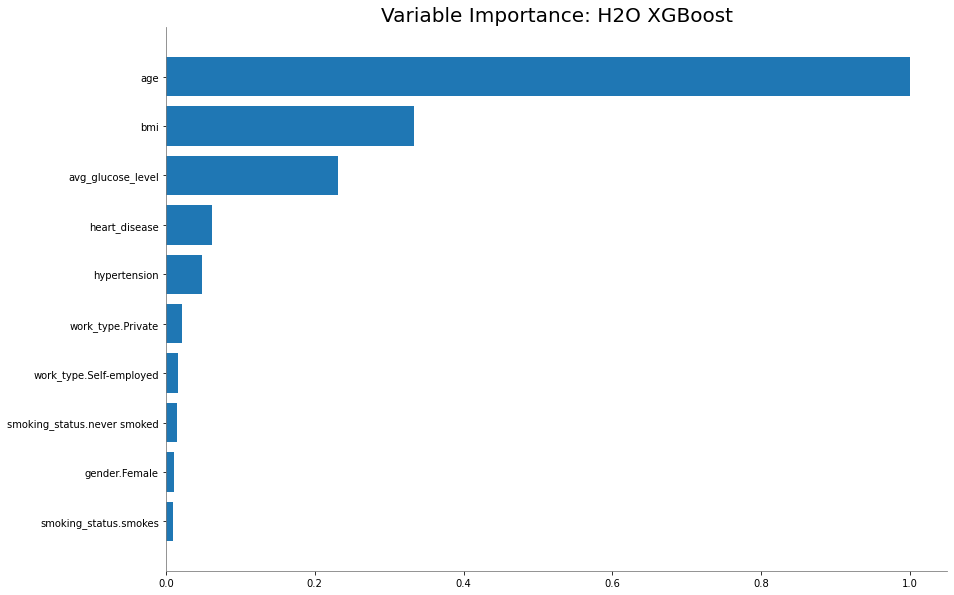

<Figure size 432x288 with 0 Axes>

In [493]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Age, average glucose level and BMI are the most important variables here.

16
glm


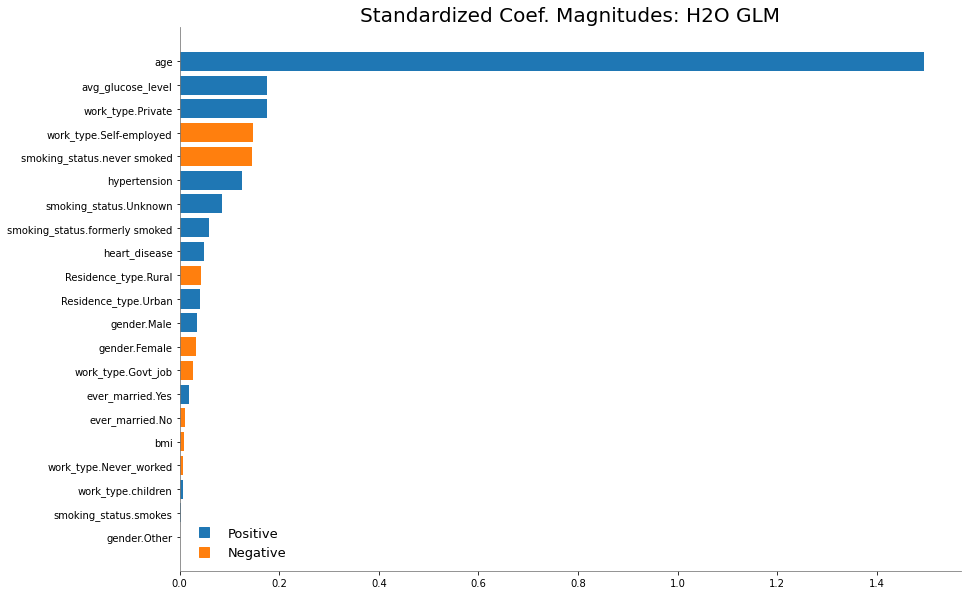

In [494]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()
  

In [495]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [496]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.8603063603063603,
 'gini': 0.7206127206127206,
 'logloss': 0.1412403170581972,
 'mse': 0.037585660107488934,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.1938702145959738}

In [497]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [498]:
aml2 = H2OAutoML(max_runtime_secs=run_time, seed=123,include_algos = ["XGBoost"])

In [499]:
aml2.train(x=X,y=y_category,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_2_20220425_22233_model_51


Model Summary: 


,,number_of_trees
0,,51.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.040208653979891
RMSE: 0.20052095646064277
LogLoss: 0.14759885386493354
Mean Per-Class Error: 0.2916387280300721
AUC: 0.8788891852077618
AUCPR: 0.3220439499186148
Gini: 0.7577783704155236

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18076396733522415: 


,,No,Yes,Error,Rate
0,No,3671.0,189.0,0.049,(189.0/3860.0)
1,Yes,109.0,95.0,0.5343,(109.0/204.0)
2,Total,3780.0,284.0,0.0733,(298.0/4064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.180764,0.389344,124.0
1,max f2,0.078124,0.476773,244.0
2,max f0point5,0.254261,0.374088,62.0
3,max accuracy,0.417006,0.951772,14.0
4,max precision,0.520024,1.000000,0.0
5,max recall,0.009694,1.000000,386.0
6,max specificity,0.520024,1.000000,0.0
7,max absolute_mcc,0.162197,0.362638,145.0
8,max min_per_class_accuracy,0.065004,0.803109,261.0
9,max mean_per_class_accuracy,0.055846,0.810558,275.0



Gains/Lift Table: Avg response rate:  5.02 %, avg score:  5.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010089,0.330739,11.175514,11.175514,0.560976,0.414602,0.560976,0.414602,0.112745,0.112745,1017.551411,1017.551411,0.108082
1,2,0.020177,0.259555,7.774271,9.474892,0.390244,0.288979,0.475610,0.351790,0.078431,0.191176,677.427068,847.489240,0.180037
2,3,0.030020,0.232177,3.984314,7.674703,0.200000,0.245166,0.385246,0.316831,0.039216,0.230392,298.431373,667.470267,0.210962
3,4,0.040108,0.219317,5.830703,7.210875,0.292683,0.225667,0.361963,0.293901,0.058824,0.289216,483.070301,621.087453,0.262273
4,5,0.050197,0.205698,4.858919,6.738178,0.243902,0.212088,0.338235,0.277458,0.049020,0.338235,385.891918,573.817762,0.303261
5,6,0.100148,0.150175,4.121704,5.433155,0.206897,0.176555,0.272727,0.227130,0.205882,0.544118,312.170385,443.315508,0.467434
6,7,0.150098,0.109916,1.962716,4.278239,0.098522,0.129463,0.214754,0.194628,0.098039,0.642157,96.271612,327.823851,0.518064
7,8,0.200049,0.078366,2.355259,3.798085,0.118227,0.092967,0.190652,0.169244,0.117647,0.759804,135.525935,279.808504,0.589338
8,9,0.299951,0.046056,1.128562,2.908974,0.056650,0.058533,0.146021,0.132371,0.112745,0.872549,12.856177,190.897393,0.602860
9,10,0.400098,0.026698,0.440526,2.291103,0.022113,0.036360,0.115006,0.108339,0.044118,0.916667,-55.947391,129.110291,0.543869




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.04270717926929882
RMSE: 0.20665715392722028
LogLoss: 0.15871981483063763
Mean Per-Class Error: 0.28440770090419587
AUC: 0.8474899674895865
AUCPR: 0.2276030045379893
Gini: 0.694979934979173

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12104855291545391: 


,,No,Yes,Error,Rate
0,No,3443.0,417.0,0.108,(417.0/3860.0)
1,Yes,94.0,110.0,0.4608,(94.0/204.0)
2,Total,3537.0,527.0,0.1257,(511.0/4064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.121049,0.300958,183.0
1,max f2,0.075341,0.439927,242.0
2,max f0point5,0.278262,0.285433,53.0
3,max accuracy,0.444214,0.950295,7.0
4,max precision,0.527912,1.000000,0.0
5,max recall,0.009699,1.000000,390.0
6,max specificity,0.527912,1.000000,0.0
7,max absolute_mcc,0.075341,0.288323,242.0
8,max min_per_class_accuracy,0.061232,0.778756,266.0
9,max mean_per_class_accuracy,0.050387,0.786605,286.0



Gains/Lift Table: Avg response rate:  5.02 %, avg score:  5.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010089,0.319265,8.746055,8.746055,0.439024,0.392487,0.439024,0.392487,0.088235,0.088235,774.605452,774.605452,0.082277
1,2,0.020177,0.273850,5.344811,7.045433,0.268293,0.294092,0.353659,0.343289,0.053922,0.142157,434.481110,604.543281,0.128426
2,3,0.030020,0.242576,1.494118,5.225329,0.075000,0.257200,0.262295,0.315063,0.014706,0.156863,49.411765,422.532948,0.133547
3,4,0.040108,0.220178,3.401243,4.766510,0.170732,0.232728,0.239264,0.294353,0.034314,0.191176,240.124342,376.651029,0.159052
4,5,0.050197,0.205286,6.316595,5.078047,0.317073,0.214325,0.254902,0.278269,0.063725,0.254902,531.659493,407.804691,0.215524
5,6,0.100148,0.144039,3.631025,4.356314,0.182266,0.173308,0.218673,0.225917,0.181373,0.436275,263.102482,335.631353,0.353891
6,7,0.150098,0.108536,2.747803,3.821022,0.137931,0.125089,0.191803,0.192363,0.137255,0.573529,174.780257,282.102218,0.445809
7,8,0.200049,0.077173,2.355259,3.455032,0.118227,0.093047,0.173432,0.167565,0.117647,0.691176,135.525935,245.503220,0.517083
8,9,0.299951,0.048340,1.472037,2.794576,0.073892,0.061522,0.140279,0.132246,0.147059,0.838235,47.203709,179.457607,0.566733
9,10,0.400098,0.027026,0.636315,2.254347,0.031941,0.037939,0.113161,0.108640,0.063725,0.901961,-36.368454,125.434725,0.528386




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.882383,0.015417,0.891759,0.900369,0.869619,0.863469,0.886699
1,auc,0.847768,0.022457,0.808211,0.853974,0.858714,0.854322,0.863617
2,err,0.117617,0.015417,0.108241,0.099631,0.130381,0.136531,0.113300
3,err_count,95.600000,12.541929,88.000000,81.000000,106.000000,111.000000,92.000000
4,f0point5,0.255065,0.017867,0.257069,0.277008,0.261122,0.227723,0.252404
5,f1,0.317401,0.017415,0.312500,0.330578,0.337500,0.292994,0.313433
6,f2,0.421875,0.031363,0.398406,0.409836,0.477032,0.410714,0.413386
7,lift_top_group,8.854851,1.560741,8.813008,11.016260,8.813008,6.609756,9.022222
8,logloss,0.158719,0.004937,0.166396,0.156783,0.155836,0.160637,0.153941
9,max_per_class_error,0.455976,0.070858,0.512195,0.512195,0.341463,0.439024,0.475000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-25 02:24:51,3.174 sec,0.0,0.500000,0.693147,0.500000,0.050197,1.000000,0.949803
1,,2022-04-25 02:24:51,3.201 sec,5.0,0.239822,0.249514,0.758369,0.227409,7.641150,0.120817
2,,2022-04-25 02:24:51,3.226 sec,10.0,0.210857,0.183451,0.825420,0.262943,11.383754,0.093750
3,,2022-04-25 02:24:51,3.255 sec,15.0,0.206289,0.166536,0.843002,0.269631,10.203730,0.075787
4,,2022-04-25 02:24:51,3.295 sec,20.0,0.204704,0.159648,0.853829,0.282088,11.661406,0.102362
5,,2022-04-25 02:24:51,3.336 sec,25.0,0.203436,0.155491,0.864010,0.291591,11.175514,0.099163
6,,2022-04-25 02:24:51,3.385 sec,30.0,0.202623,0.153009,0.867267,0.298150,11.661406,0.081201
7,,2022-04-25 02:24:51,3.438 sec,35.0,0.201980,0.151356,0.870188,0.302916,11.175514,0.084646
8,,2022-04-25 02:24:51,3.505 sec,40.0,0.201382,0.149907,0.873213,0.308203,11.661406,0.080709
9,,2022-04-25 02:24:51,3.563 sec,45.0,0.200904,0.148701,0.875951,0.314620,11.175514,0.075295



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,255.799545,1.000000,0.584961
1,bmi,79.112633,0.309276,0.180914
2,avg_glucose_level,55.506050,0.216990,0.126931
3,heart_disease,13.424392,0.052480,0.030699
4,hypertension,9.919926,0.038780,0.022685
5,work_type.Private,5.903721,0.023079,0.013501
6,work_type.Self-employed,5.118886,0.020011,0.011706
7,smoking_status.never smoked,2.763225,0.010802,0.006319
8,smoking_status.formerly smoked,2.672127,0.010446,0.006111
9,smoking_status.smokes,2.296543,0.008978,0.005252


GLM and XG boost are the best performing models here

In [500]:
!pip install shap

# Shapley Analysis on the model


In [501]:
import shap

shap.initjs()

# SHAP SUMMARY PLOT


In [502]:


explainer = shap.TreeExplainer(rfc
                               
                               )
shap_values = explainer.shap_values(x_test)


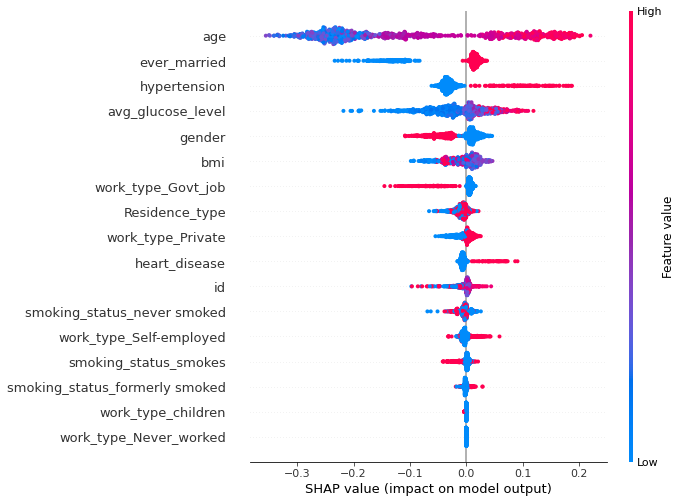

In [503]:
shap.summary_plot(shap_values[1],x_test,feature_names = df_pd.columns.tolist())

The plot above shows the effect of each data point on our predictions.

Age is the most impactful feature, a high age will tend to increase stroke risk. The color shows whether that feature was high or low for that row of the dataset Horizontal location shows whether the effect of that value caused a higher or lower prediction. Red color here tends to increase the value and blue tends to decrease the same

For example, for age, the top left point reduced the prediction.

# SHAP Feature Importance Plot

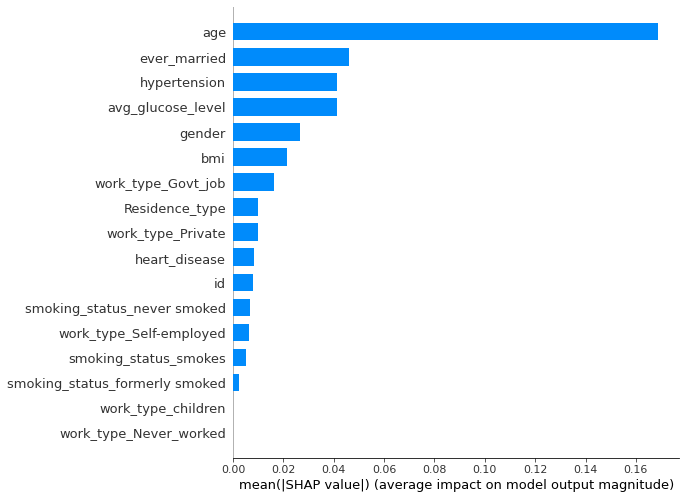

In [504]:
shap.summary_plot(shap_values[1], x_test, plot_type='bar',feature_names = df_pd.columns.tolist())

SHAP Values break down a prediction to show the impact of each feature.
It interprets the impact of having a certain value for a given feature

Here we can see that age is the more important feature here and it plays a significant role in predicting the heart stroke. Blue shows its capability of prediction in class 0(which is not predicting a heart stroke) where red shows it increased role in predicting a heart stroke.

Age, hypertension and glucose level play a significant role here


The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).

# EXPLAIN Prediction with SHAP


In [505]:
row_to_show = 1
data_for_prediction = x_test[1]  # use 1 row of data here. 



import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rfc)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction,feature_names=df_pd.columns)

The above graph is generated when we applied SHAP algorithm on instance number 1 from our set.

In above plot, we predicted 0.53, whereas the base_value is 0.50. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature’s effect. Feature values decreasing the prediction are in blue. The biggest impact comes from age, hypertension and BMI where hypertension has the biggest impact for the following prediction, while low glucose level,  gender if female and work type as self employed has the effect of decreasing the prediction.


In [506]:
lin_reg_explainer1 = shap.LinearExplainer(lg_reg, x_train)

# Dependence Plots


From the dependence plot of linear regression, we can see that age has a trend of increasing with SHAP values.

From the dependence plot of linear regression, we can see that glucose level has a trend of increasing with SHAP values.

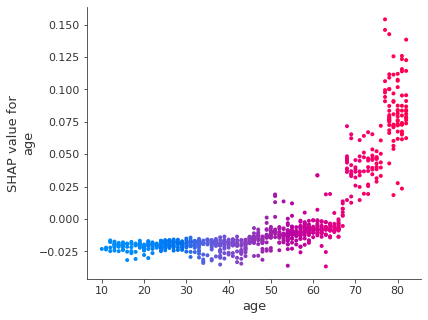

In [507]:
rfc=RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rfc.fit(x_train1,y_train1)
shap_values = shap.TreeExplainer(rfc).shap_values(x_test1)
shap_values[0]
shap.dependence_plot('age', shap_values[1], x_test1, interaction_index='age')


From the dependence plot, we can see that age has a trend of increasing with SHAP values.

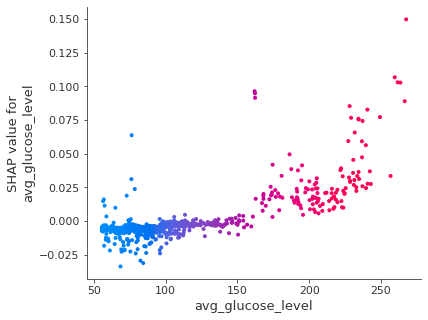

In [508]:
shap.dependence_plot('avg_glucose_level', shap_values[1], x_test1, interaction_index='avg_glucose_level')

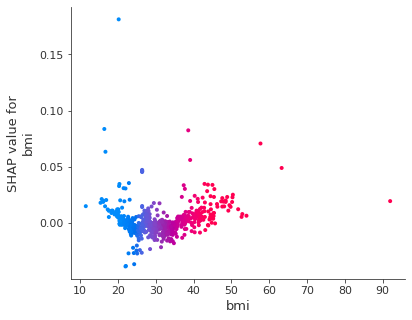

In [509]:
shap.dependence_plot('bmi', shap_values[1], x_test1, interaction_index='bmi')

Both dependence plots of avg_glucose_level and bmi also show their respective thresholds where stroke is more prevalent at higher values for the random forest classifier.

## Conclusion

We interpreted the SHAP values and the feature importance from all the models. We can see that age, hypertension, heart disease, bmi and smoking are the most important features here. We also verified the same by the shapley dependence plots and the feature importance as well as summary plot. The best model performing model by  auto ML H20 is GLM and XG boost model. The important features as predicted by these models are also age, hypertension and the glucose level.

Random forest classifier and logistic regression performed the best where the accuracy is less for logistic regression whereas the AUC is less for random forest. Logistic regression is the best model so far in terms of recall for heart stroke prediction.

Testing score for the best model of logistic regression is 0.74 and recall is 0.82

## Citations
https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/
https://medium.com/@sid321axn/machine-learning-interpretability-for-heart-disease-prediction-23d8d95a307b

https://www.kaggle.com/code/dansbecker/shap-values/tutorial

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb


# **License**

MIT License

Copyright (c) 2022 trivedi-mi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
